<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


- Visualize the distribution of data.

- Visualize the relationship between two features.

- Visualize composition and comparison of data.


## Demo: How to work with database


Download the database file.


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [4]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [8]:
# Download the CSV file
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [9]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [10]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [11]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [12]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query

For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [14]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


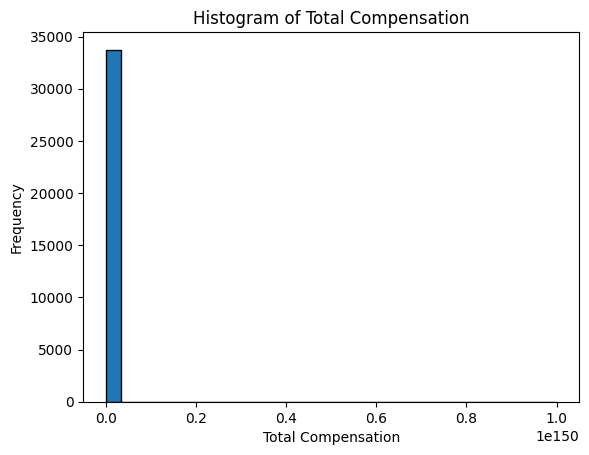

In [15]:
## Write your code here
# Plot a histogram of CompTotal (Total Compensation)
query = "SELECT * FROM main"
df_all = pd.read_sql_query(query, conn)

df_all['CompTotal'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Total Compensation')
plt.show()


**Box Plots**

Plot a box plot of Age.


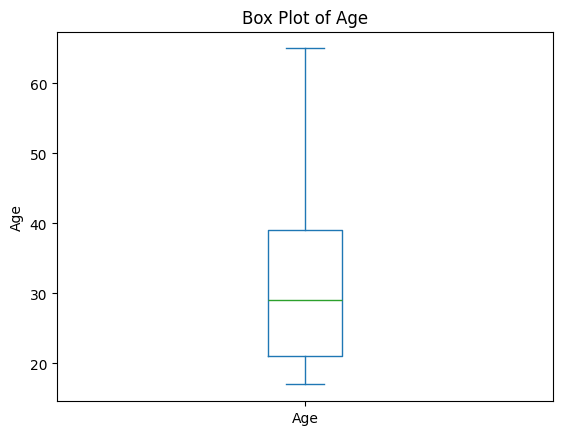

In [17]:
## Write your code here
# Convert age ranges to numeric values
age_mapping = {
	'Under 18 years old': 17,
	'18-24 years old': 21,
	'25-34 years old': 29,
	'35-44 years old': 39,
	'45-54 years old': 49,
	'55-64 years old': 59,
	'65 years or older': 65
}

df_all['Age'] = df_all['Age'].map(age_mapping)

# Plot a box plot of Age
df_all['Age'].dropna().plot(kind='box')
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


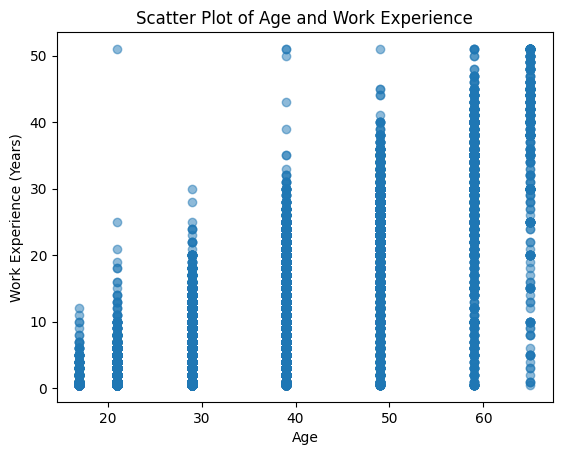

In [22]:
## Write your code here
# Map string values to numeric values for YearsCodePro
years_code_pro_mapping = {
	'Less than 1 year': 0.5,
	'More than 50 years': 51
}
# print(df_all['YearsCodePro'].value_counts())

# Apply the mapping and convert to float
df_all['YearsCodePro'] = df_all['YearsCodePro'].replace(years_code_pro_mapping).astype(float)

# Create a scatter plot of Age and WorkExp
df_all['WorkExp'] = df_all['YearsCodePro']  # Use the converted YearsCodePro for plotting

plt.scatter(df_all['Age'], df_all['WorkExp'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.title('Scatter Plot of Age and Work Experience')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


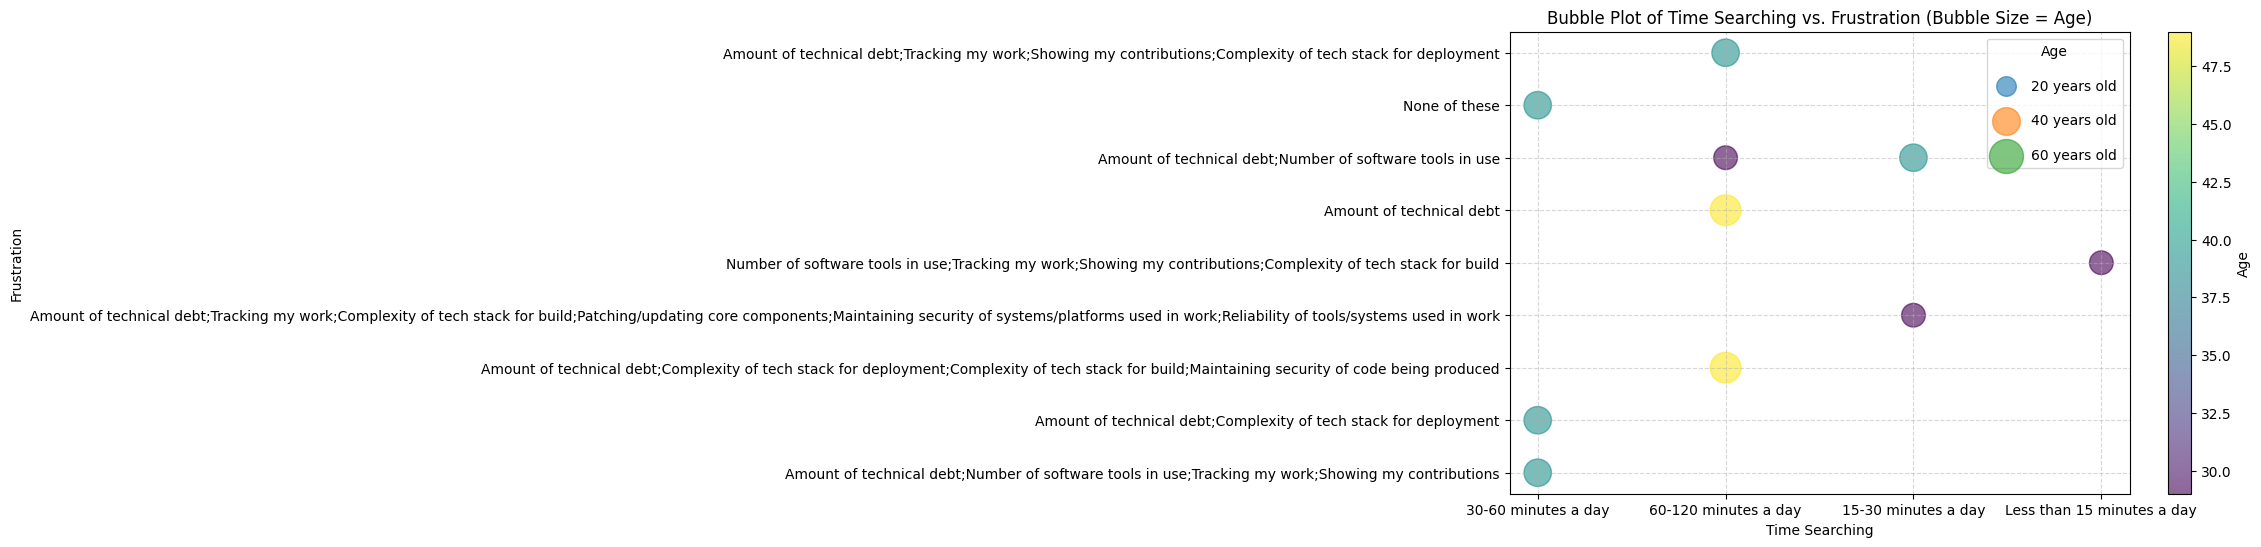

In [31]:
## Write your code here
# Drop rows with missing values in the relevant columns
df_all_cleaned = df_all.dropna(subset=['Age', 'TimeSearching', 'Frustration']).head(10)

# Create the bubble plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_all_cleaned['TimeSearching'], 
    df_all_cleaned['Frustration'], 
    s=df_all_cleaned['Age'] * 10,  # Scale the bubble size by Age
    alpha=0.6,                     # Make bubbles semi-transparent
    c=df_all_cleaned['Age'],       # Color the bubbles by Age
    cmap='viridis'                 # Use the 'viridis' colormap
)

# Add a colorbar to show the mapping of Age to color
plt.colorbar(scatter, label='Age')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels and title
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.title('Bubble Plot of Time Searching vs. Frustration (Bubble Size = Age)')

# Add a legend for bubble size
for age in [20, 40, 60]:  # Example ages to represent bubble sizes
    plt.scatter([], [], s=age * 10, label=f'{age} years old', alpha=0.6)
plt.legend(title='Age', labelspacing=1.5)

# Show the plot
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


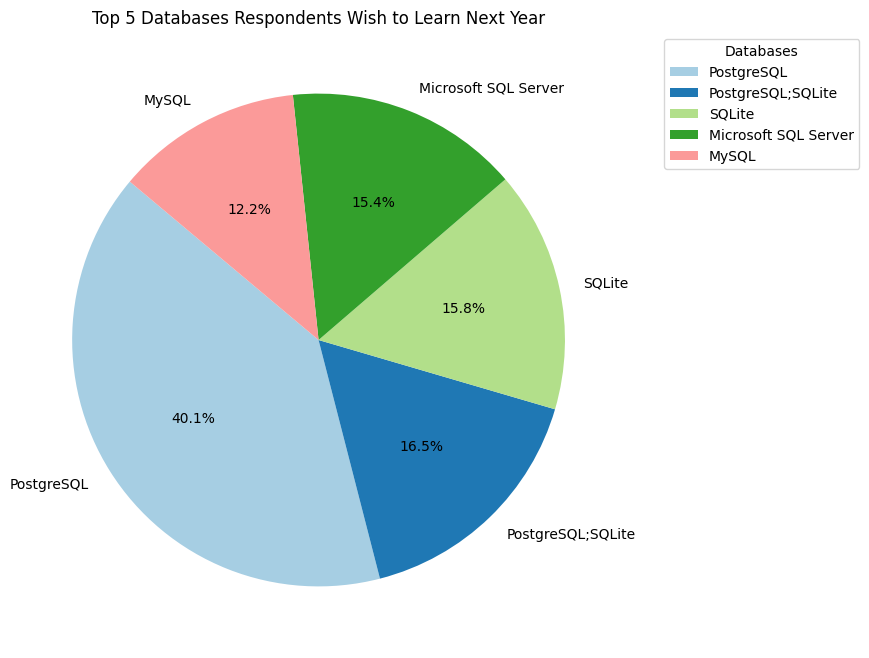

In [35]:
# Count the occurrences of each database in the 'DatabaseWantToWorkWith' column
database_counts = df_all['DatabaseWantToWorkWith'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
database_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.ylabel('')  # Hide the y-label

# Add a legend
plt.legend(database_counts.index, title="Databases", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Stacked Charts**

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


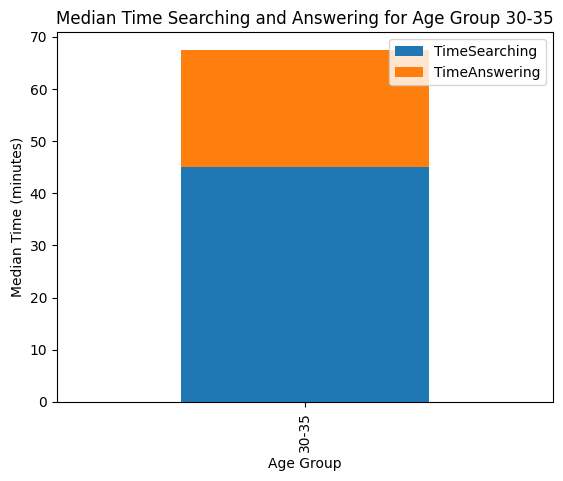

In [38]:
## Write your code here
# Map string values to numeric values for TimeSearching and TimeAnswering
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}

df_all['TimeSearching'] = df_all['TimeSearching'].map(time_mapping)
df_all['TimeAnswering'] = df_all['TimeAnswering'].map(time_mapping)

# Filter the data for the age group 30 to 35
age_group = df_all[(df_all['Age'] == 29)]

# Calculate the median TimeSearching and TimeAnswering for the age group
median_time_searching = age_group['TimeSearching'].median()
median_time_answering = age_group['TimeAnswering'].median()

# Create a DataFrame for the stacked bar chart
data = pd.DataFrame({
    'TimeSearching': [median_time_searching],
    'TimeAnswering': [median_time_answering]
}, index=['30-35'])

# Plot the stacked bar chart
data.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Median Time (minutes)')
plt.title('Median Time Searching and Answering for Age Group 30-35')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


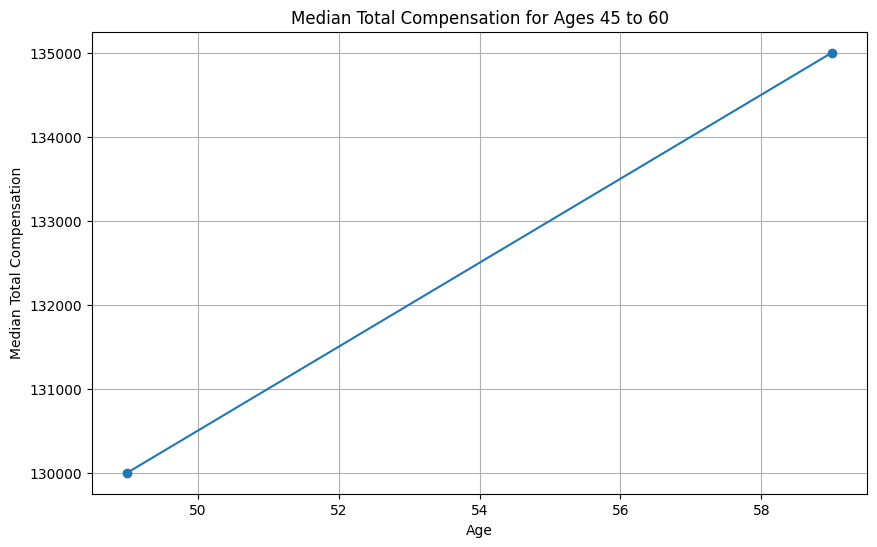

In [39]:
## Write your code here
# Filter the data for ages 45 to 60
age_filtered = df_all[(df_all['Age'] >= 45) & (df_all['Age'] <= 60)]

# Group by Age and calculate the median CompTotal
median_comp_total = age_filtered.groupby('Age')['CompTotal'].median()

# Plot the line chart
plt.figure(figsize=(10, 6))
median_comp_total.plot(kind='line', marker='o')
plt.xlabel('Age')
plt.ylabel('Median Total Compensation')
plt.title('Median Total Compensation for Ages 45 to 60')
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


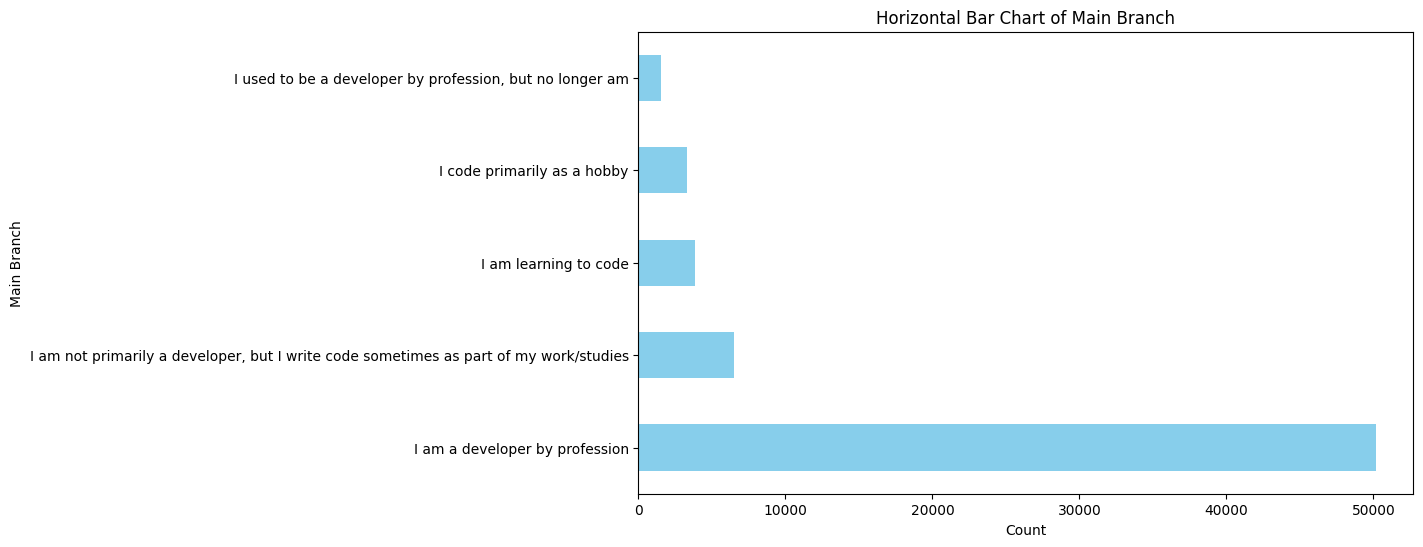

In [40]:
## Write your code here
# Count the occurrences of each category in the 'MainBranch' column
main_branch_counts = df_all['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Horizontal Bar Chart of Main Branch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:

Ayushi Jain


### Other Contributors:

- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
